In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idanalysis.idsdata import WLSData
from idanalysis.analysis import TrajectoryAnalysis

# Verify field

In [2]:
wls_data = WLSData()
currents = list(wls_data.CURR_DICT.keys())

i = 0
print(currents[i])
fmap = wls_data.get_fmap(curr=currents[0])

1
/opt/ids-data/lnls-ima/si-wls/model-09/simulation/magnetic/updated-BHcurves/magnet-results/field-maps-two-currents/SWLS_I=1A_X=-10_10mm_Y=-1.75_1.75mm_Z=-1000_1000mm.txt


In [3]:
wls_data.subsecs

['ID14SB']

In [3]:
print('by shape: ', fmap.by.shape)
print('rx shape: ', fmap.rx.shape)
print('ry shape: ', fmap.ry.shape)
print('rz shape: ', fmap.rz.shape)

print('ry: ', fmap.ry)
print('rx: ', fmap.rx)

print('index rx zero: ', fmap.rx_zero)
print('index ry zero: ', fmap.ry_zero)

by shape:  (3, 41, 4001)
rx shape:  (41,)
ry shape:  (3,)
rz shape:  (4001,)
ry:  [-1.75  0.    1.75]
rx:  [-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5  10. ]
index rx zero:  20
index ry zero:  1


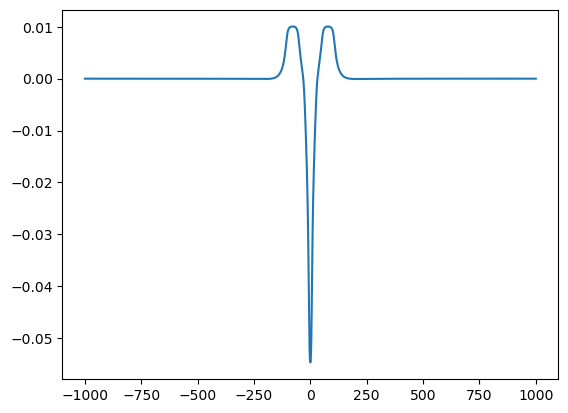

In [4]:
plt.plot(fmap.rz, fmap.by[fmap.ry_zero, fmap.rx_zero, :])

# Verify trajectory

Fieldmap setted as fieldsource
Calculating trajectory...
Rz extrapolation rz = 1000.244489 > rz_max = 1000.000000 [mm]
Rz extrapolation rz = 1000.244489 > rz_max = 1000.000000 [mm]
Rz extrapolation rz = 1000.494489 > rz_max = 1000.000000 [mm]


Text(0, 0.5, 'rx [mm]')

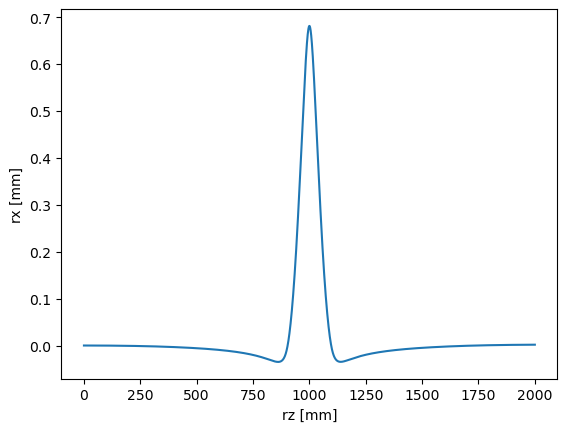

In [37]:
fmap_fname = wls_data.get_fmap_fname(curr=currents[11])
traj_anl = TrajectoryAnalysis(fieldsource=fmap_fname)
traj_anl.rk_s_step = 0.5

traj_anl.traj_init_rx = 0
traj_anl.traj_init_ry = 0
traj_anl.traj_init_px = 0
traj_anl.traj_init_py = 0
traj_anl.traj_init_rz = -1000
traj_anl.traj_max_rz = 1000

traj_anl.set_traj_configs()
traj_anl.calculate_traj()
plt.plot(traj_anl.traj.s, traj_anl.traj.rx)
plt.xlabel('rz [mm]')
plt.ylabel('rx [mm]')

# Generate kickmaps

In [10]:
for i, current in enumerate(currents):
    fmap_fname = wls_data.get_fmap_fname(curr=current)
    traj_anl = TrajectoryAnalysis(fieldsource=fmap_fname)
    traj_anl.rk_s_step = 0.5

    traj_anl.traj_init_rx = 0
    traj_anl.traj_init_ry = 0
    traj_anl.traj_init_px = 0
    traj_anl.traj_init_py = 0
    traj_anl.traj_init_rz = -995
    traj_anl.traj_max_rz = 995
    traj_anl.kmap_idlen = 2
    traj_anl.kmap_fname = 'kickmap-ID_curr_' + str(current) + '.txt'
    traj_anl.set_traj_configs()

    ry = 1e-3*np.array([-1.7, 0, 1.7])
    traj_anl.generate_kickmap(1e-3*fmap.rx, ry)

Fieldmap setted as fieldsource
rx = -10.0 mm, ry = -1.7: px = -2.5 urad, py = -0.3 urad
rx = -9.5 mm, ry = -1.7: px = -2.7 urad, py = -0.3 urad
rx = -9.0 mm, ry = -1.7: px = -2.7 urad, py = -0.2 urad
rx = -8.5 mm, ry = -1.7: px = -2.8 urad, py = -0.3 urad
rx = -8.0 mm, ry = -1.7: px = -2.8 urad, py = -0.2 urad
rx = -7.5 mm, ry = -1.7: px = -2.9 urad, py = -0.1 urad
rx = -7.0 mm, ry = -1.7: px = -2.9 urad, py = -0.2 urad
rx = -6.5 mm, ry = -1.7: px = -3.0 urad, py = -0.1 urad
rx = -6.0 mm, ry = -1.7: px = -3.0 urad, py = -0.1 urad
rx = -5.5 mm, ry = -1.7: px = -3.1 urad, py = -0.1 urad
rx = -5.0 mm, ry = -1.7: px = -3.1 urad, py = -0.2 urad
rx = -4.5 mm, ry = -1.7: px = -3.1 urad, py = -0.1 urad
rx = -4.0 mm, ry = -1.7: px = -3.1 urad, py = -0.0 urad
rx = -3.5 mm, ry = -1.7: px = -3.2 urad, py = -0.1 urad
rx = -3.0 mm, ry = -1.7: px = -3.2 urad, py = -0.0 urad
rx = -2.5 mm, ry = -1.7: px = -3.2 urad, py = 0.0 urad
rx = -2.0 mm, ry = -1.7: px = -3.1 urad, py = 0.0 urad
rx = -1.5 mm, ry =